In [1]:
!head -5 day.csv

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

#day.csvをデータフレームに取り込み
#日付を表す列は parse_dates で指定する
df = pd.read_csv('day.csv', parse_dates=[1])

#データ属性の確認
print(df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [3]:
#instantは連番で予測不能なので削除
df = df.drop('instant', axis=1)

#項目名の日本語化
columns = [
    '日付', '季節', '年', '月', '祝日', '曜日', '勤務日', '天気',
    '気温', '体感温度', '湿度', '風速', '臨時ユーザー利用数',
    '登録ユーザー利用数', '全体ユーザー利用数'
]

#項目名を日本語に置き換え
df.columns = columns

In [4]:
#先頭５行の確認
display(df.head())

#最終５行の確認
display(df.tail())

,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


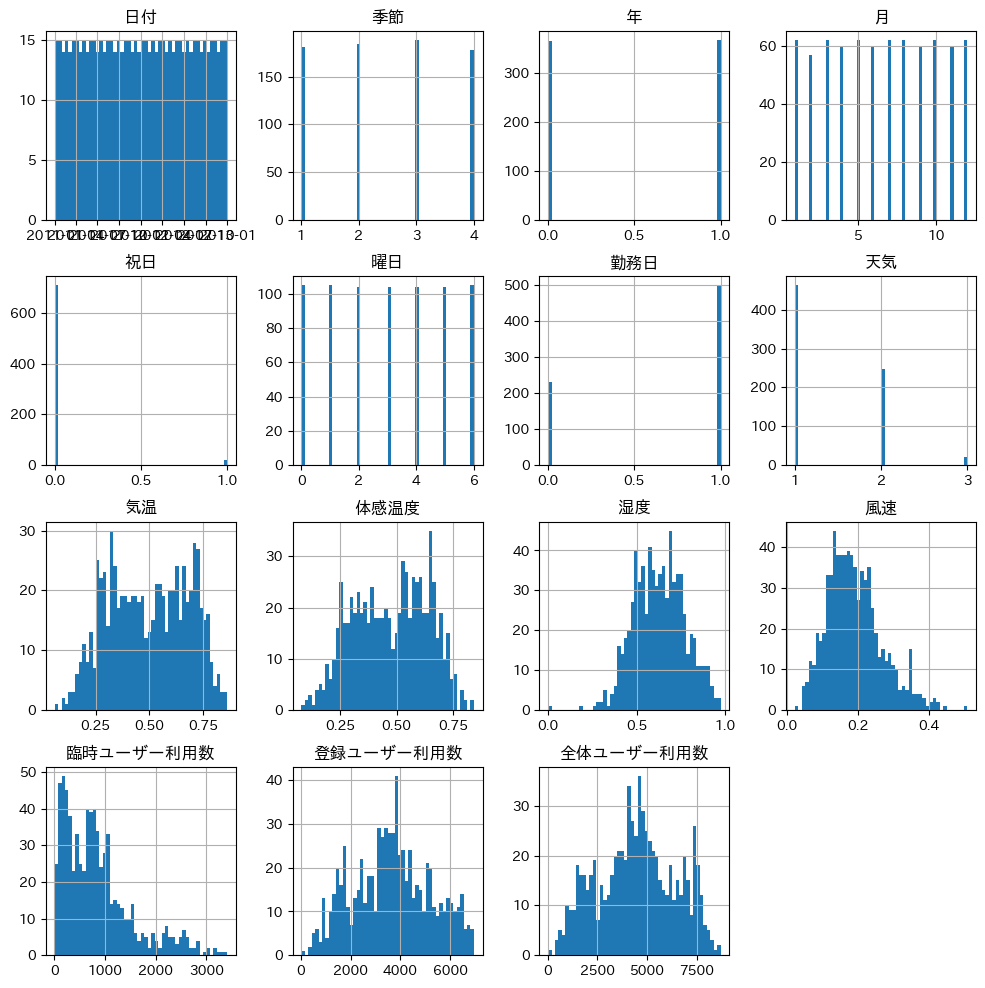

In [8]:
#データのヒストグラム表示
#度数分布表示

#グラフのサイズ調整
from pylab import rcParams
rcParams['figure.figsize'] = (12,12)

#データフレームの数値項目でヒストグラム表示
df.hist(bins=50)
plt.show()

In [9]:
#欠損値チェック
df.isnull().sum()

日付           0
季節           0
年            0
月            0
祝日           0
曜日           0
勤務日          0
天気           0
気温           0
体感温度         0
湿度           0
風速           0
臨時ユーザー利用数    0
登録ユーザー利用数    0
全体ユーザー利用数    0
dtype: int64

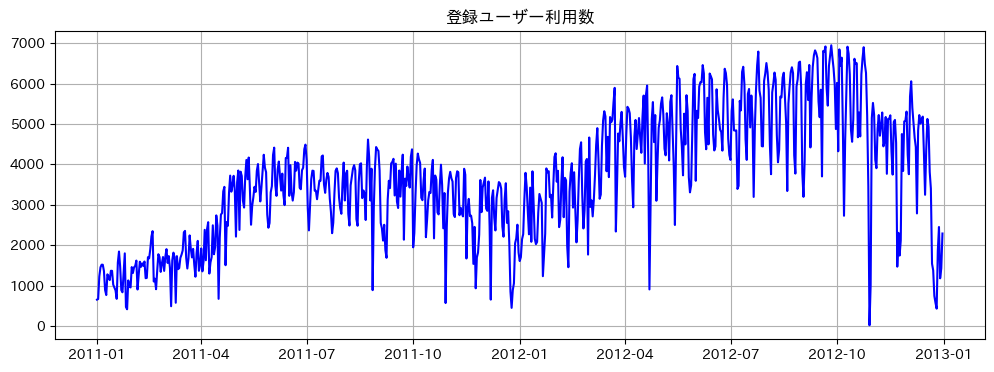

In [10]:
#時系列グラフの描画(登録ユーザー利用数)
plt.figure(figsize=(12,4))

#グラフ描画
plt.plot(df['日付'],df['登録ユーザー利用数'],c='b')

#方眼表示
plt.grid()
plt.title('登録ユーザー利用数')

#画面出力
plt.show()

In [12]:
#入力データと正解データへの分割
#x(入力データ),y(正解データ)へ分割する
x = df.drop(['日付', '臨時ユーザー利用数', '登録ユーザー利用数',
         '全体ユーザー利用数'], axis=1)
y = df['登録ユーザー利用数'].values

In [13]:
#分割日mdayの設定
mday = pd.to_datetime('2021-11-1')

#訓練用index と 検証用indexを作る
train_index = df['日付'] < mday
test_index = df['日付'] >= mday

#入力データの分割
x_train = x[train_index]
x_test = x[test_index]

#yも同様に分割
y_train = y[train_index]
y_test = y[test_index]

#日付データの分割(グラフ表示用)
dates_test = df['日付'][test_index]

In [14]:
#結果確認(サイズを確認)
print(x_train.shape)
print(x_test.shape)

#結果確認(境界値を重点的に)
display(x_train.tail())
display(x_test.head())

(731, 11)
(0, 11)


,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754
730,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846


,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速
